In [1]:
#filter warnings 
from warnings import filterwarnings
filterwarnings("ignore")

# Read Data Set


In [2]:
import pandas as pd
ComputerPrice = pd.read_csv("F:/Course/Pandas/Csv/ComputerPricesData.csv")

In [3]:
ComputerPrice

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


# Data Description

In [4]:
#Removing Duplicates Values
print("Shape of Data before removing duplicates data : ",ComputerPrice.shape)
ComputerPrice = ComputerPrice.drop_duplicates()
print("Shape of Data after removing duplicates data : ",ComputerPrice.shape)

Shape of Data before removing duplicates data :  (6259, 10)
Shape of Data after removing duplicates data :  (6183, 10)


# Problem Statement

# Determining the type of Machine Learning

# Looking at the distribution of Target variable

<AxesSubplot:>

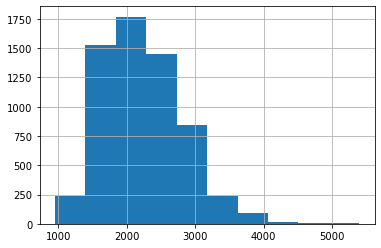

In [5]:
# Creating Bar chart as the Target variable is Continuous
ComputerPrice['price'].hist()

# Basic Data Exploration

In [6]:
# Looking at sample rows in the data
ComputerPrice.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [7]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
ComputerPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6183 non-null   int64 
 1   speed    6183 non-null   int64 
 2   hd       6183 non-null   int64 
 3   ram      6183 non-null   int64 
 4   screen   6183 non-null   int64 
 5   cd       6183 non-null   object
 6   multi    6183 non-null   object
 7   premium  6183 non-null   object
 8   ads      6183 non-null   int64 
 9   trend    6183 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 531.4+ KB


In [8]:
# Looking at the descriptive statistics of the data
ComputerPrice.describe(include='all')

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183,6183,6183,6183.000000,6183.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3314,5325,5573,NaN,NaN
mean,2221.837943,52.129549,417.760796,8.305353,14.614265,NaN,NaN,NaN,220.906033,15.944364
std,582.042129,21.190655,259.458342,5.649178,0.907304,NaN,NaN,NaN,74.958628,7.903073
min,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.000000,10.000000
50%,2145.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,22.000000


In [9]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
ComputerPrice.nunique()

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
ads         34
trend       35
dtype: int64

# Basic Data Exploration Results

# Visual Exploratory Data Analysis

# Visualize distribution of all the Categorical Predictor variables in the data using bar plots

In [10]:
#seperating continous and categorical data
cat = []
con = []

for i in ComputerPrice.columns:
    if (ComputerPrice[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [11]:
cat

['cd', 'multi', 'premium']

In [12]:
con

['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend']

In [13]:
import seaborn as sb
from seaborn import countplot
from seaborn import displot

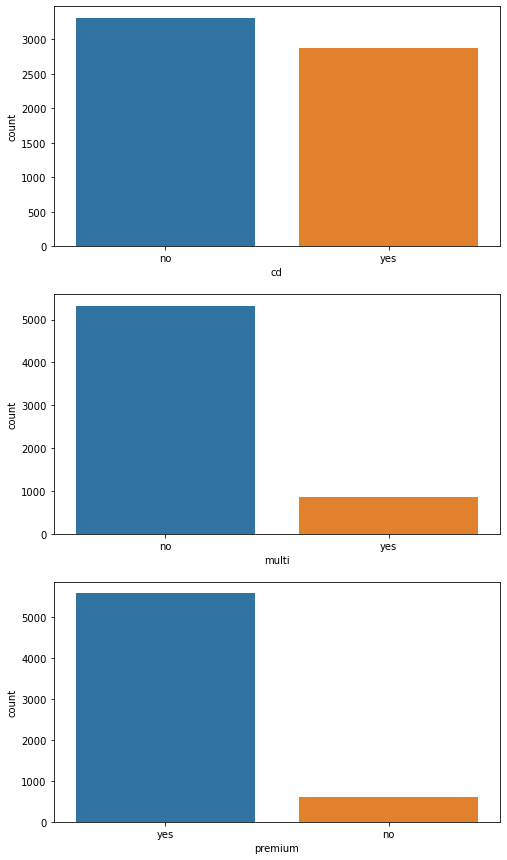

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,15))
x = 1
for i in cat:
    plt.subplot(3,1,x)
    countplot(ComputerPrice[i])
    x = x + 1

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'speed'}>,
        <AxesSubplot:title={'center':'hd'}>],
       [<AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'screen'}>,
        <AxesSubplot:title={'center':'ads'}>],
       [<AxesSubplot:title={'center':'trend'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

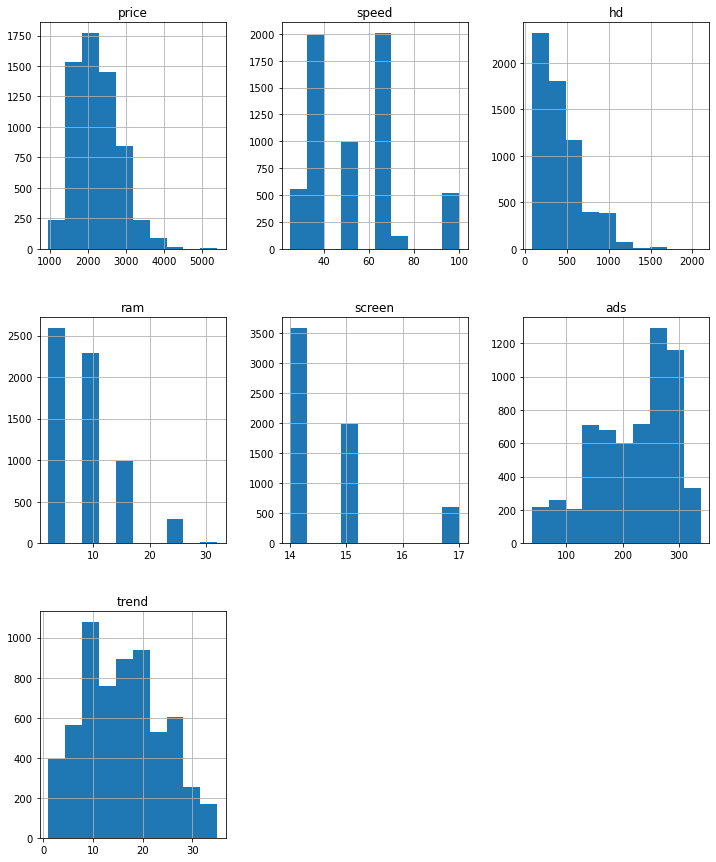

In [15]:
ComputerPrice.hist(con,figsize=(12,15))

# Missing Data Treatment

In [16]:
ComputerPrice.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

No missing Data

# Visual exploration of relationship between variables

# Statistical measurement of relationship strength between variables

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts

In [17]:
con

['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend']

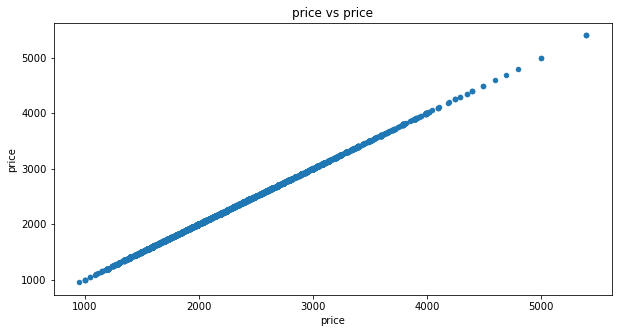

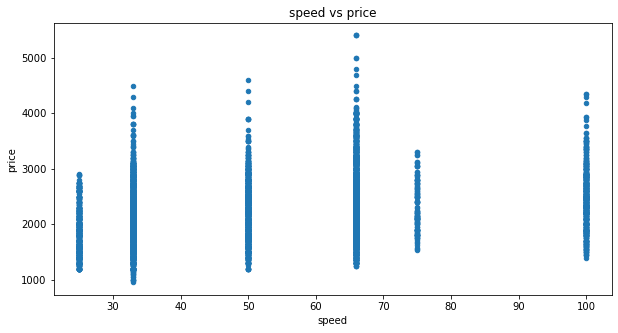

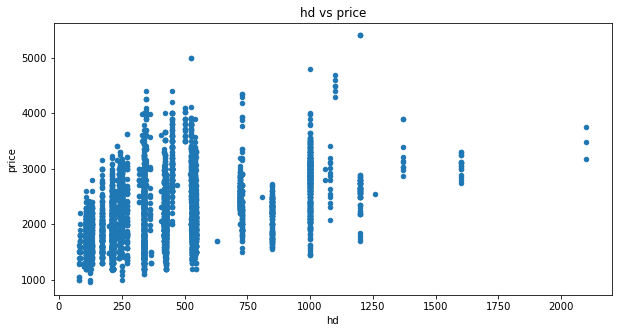

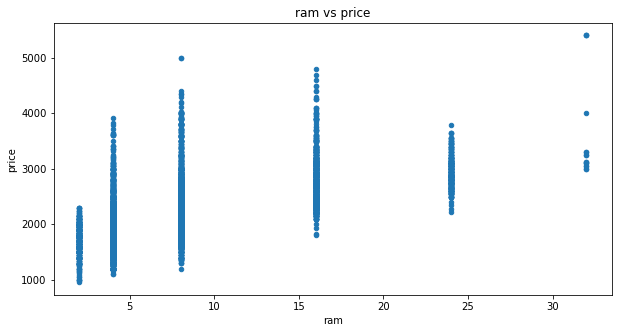

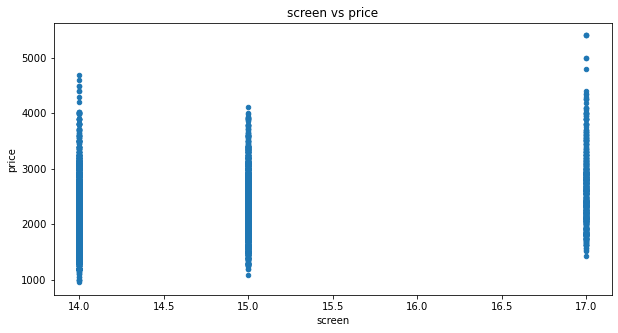

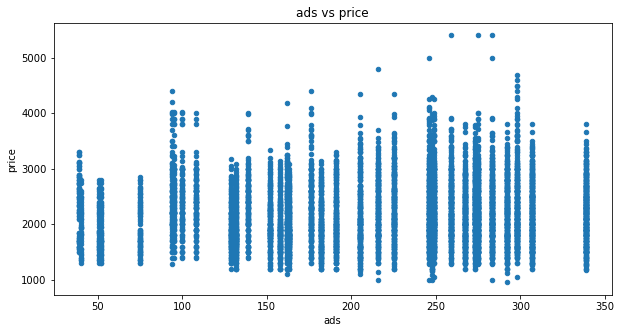

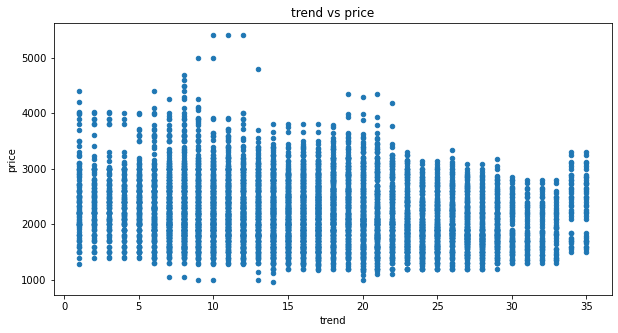

In [18]:
for i in con:
    ComputerPrice.plot.scatter(x = i, y = 'price', figsize=(10,5) ,title = i + " vs " + 'price')

In [19]:
# Calculating correlation matrix
CorrData = ComputerPrice[con].corr()

In [20]:
CorrData

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.298515,0.428845,0.621144,0.295094,0.056434,-0.201662
speed,0.298515,1.000000,0.370356,0.232566,0.187519,-0.214349,0.404830
hd,0.428845,0.370356,1.000000,0.777399,0.232675,-0.323342,0.577599
ram,0.621144,0.232566,0.777399,1.000000,0.208871,-0.181463,0.276938
screen,0.295094,0.187519,0.232675,0.208871,1.000000,-0.092144,0.189549
ads,0.056434,-0.214349,-0.323342,-0.181463,-0.092144,1.000000,-0.320626
trend,-0.201662,0.404830,0.577599,0.276938,0.189549,-0.320626,1.000000


In [21]:
CorrData['price'][abs(CorrData['price'])>0.2]

price     1.000000
speed     0.298515
hd        0.428845
ram       0.621144
screen    0.295094
trend    -0.201662
Name: price, dtype: float64

# Relationship exploration: Categorical Vs Continuous -- Box Plots

In [22]:
cat

['cd', 'multi', 'premium']

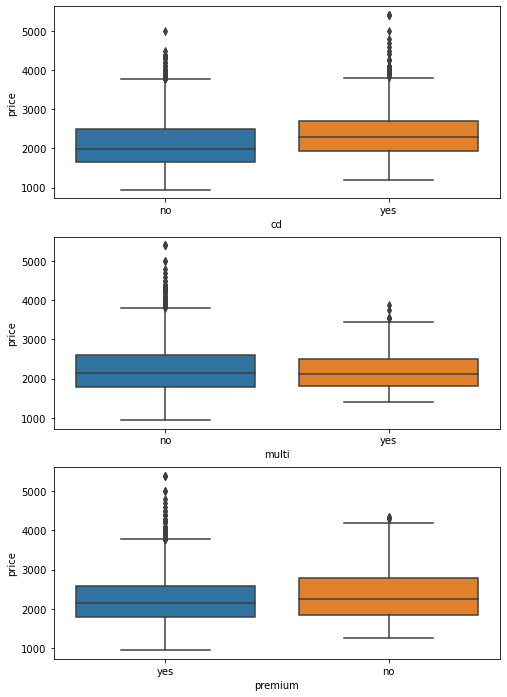

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))
x = 1
for i in cat :
    plt.subplot(3,1,x)
    sb.boxplot(ComputerPrice[i],ComputerPrice['price'])
    x = x + 1

In [24]:
#defining funcation for anova 
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [25]:
cat

['cd', 'multi', 'premium']

In [26]:
FunctionAnova(inpData=ComputerPrice,TargetVariable='price',CategoricalPredictorList=['cd', 'multi', 'premium'])

##### ANOVA Results ##### 

cd is correlated with price | P-Value: 8.113565801487017e-55
multi is NOT correlated with price | P-Value: 0.19076936432204794
premium is correlated with price | P-Value: 2.7969949437607514e-10


['cd', 'premium']

# Define X and Y

In [27]:
Y = ComputerPrice['price']
X = ComputerPrice.drop(labels = ['price','multi','ads'],axis=1)

In [28]:
X

,speed,hd,ram,screen,cd,premium,trend
0,25,80,4,14,no,yes,1
1,33,85,2,14,no,yes,1
2,25,170,4,15,no,yes,1
3,25,170,8,14,no,no,1
4,33,340,16,14,no,yes,1
...,...,...,...,...,...,...,...
6254,100,528,8,15,no,yes,35
6255,66,850,16,15,yes,yes,35
6256,100,1200,24,15,yes,yes,35
6257,100,850,16,15,yes,yes,35


In [29]:
Y

0       1499
1       1795
2       1595
3       1849
4       3295
        ... 
6254    1690
6255    2223
6256    2654
6257    2195
6258    2490
Name: price, Length: 6183, dtype: int64

In [30]:
X.shape

(6183, 7)

In [31]:
Y.shape

(6183,)

In [32]:
X.index = range(0,6183,1)
Y.index = range(0,6183,1)

# Seperating continous and categorical columns from X

In [33]:
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [34]:
cat

['cd', 'premium']

In [35]:
con

['speed', 'hd', 'ram', 'screen', 'trend']

# Standardization of Data

In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [37]:
Xnew

,speed,hd,ram,screen,trend,cd_no,cd_yes,premium_no,premium_yes
0,-1.280364,-1.301897,-0.762182,-0.677077,-1.891109,1,0,0,1
1,-0.902808,-1.282625,-1.116244,-0.677077,-1.891109,1,0,0,1
2,-1.280364,-0.954993,-0.762182,0.425179,-1.891109,1,0,0,1
3,-1.280364,-0.954993,-0.054057,-0.677077,-1.891109,1,0,1,0
4,-0.902808,-0.299729,1.362193,-0.677077,-1.891109,1,0,0,1
...,...,...,...,...,...,...,...,...,...
6178,2.259219,0.424916,-0.054057,0.425179,2.411363,1,0,0,1
6179,0.654608,1.666064,1.362193,0.425179,2.411363,0,1,0,1
6180,2.259219,3.015137,2.778442,0.425179,2.411363,0,1,0,1
6181,2.259219,1.666064,1.362193,0.425179,2.411363,0,1,0,1


# Finding Outliers 

In [38]:
Outilers = []
for i in Xnew:
    Outilers.extend(list(Xnew[Xnew[i]>3].index))
    Outilers.extend(list(Xnew[Xnew[i]<-3].index))

# Removing Outliers from both X and Y

In [39]:
Xnew = Xnew.drop(index=Outilers,axis=0)
Y = Y.drop(index=Outilers,axis=0)

In [40]:
Xnew.shape

(6087, 9)

In [41]:
Y.shape

(6087,)

# Splitting Data into training and testing set

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.3,random_state=42)

# Multiple Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrModel = lr.fit(xtrain,ytrain)
#prediction on testing data
prediction = lrModel.predict(xtest)

#Goodness of model
from sklearn.metrics import r2_score
print("\nR2_score : ",r2_score(ytrain,lrModel.predict(xtrain)))
#Defining Accuracy 
import numpy as np
def Accuracy_score(orig,pred):
    MAPE = np.mean(100*(np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
custom_accuracy = make_scorer(Accuracy_score,greater_is_better=True)
#calculating accuracy for 10-fold cross validation
Accuracy_results = cross_val_score(lrModel,Xnew,Y,cv=10,scoring=custom_accuracy)
print("\nAccuracy score for 10-fold cross_valdidation : ",Accuracy_results)
print("\nFinal Average Accuracy of model : ",round(Accuracy_results.mean(),2))


R2_score :  0.7613846529439022

Accuracy score for 10-fold cross_valdidation :  [86.74511618 87.82636237 89.49470081 88.70472879 90.81497997 92.00643294
 91.59198649 90.7568624  89.47073045 87.53094793]

Final Average Accuracy of model :  89.49


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,25,1):
    dtr = DecisionTreeRegressor(max_depth = i,criterion='mse',random_state=42)
    dtrModel = dtr.fit(xtrain,ytrain)
    #prediction on testing data
    prediction = dtrModel.predict(xtest)
    print("Value of max_depth : ",i)
    #Goodness of model
    from sklearn.metrics import r2_score
    print("\nR2_score : ",r2_score(ytrain,dtrModel.predict(xtrain)))
    #Defining Accuracy 
    import numpy as np
    def Accuracy_score(orig,pred):
        MAPE = np.mean(100*(np.abs(orig-pred)/orig))
        return(100-MAPE)
    from sklearn.metrics import make_scorer
    from sklearn.model_selection import cross_val_score
    custom_accuracy = make_scorer(Accuracy_score,greater_is_better=True)
    #calculating accuracy for 10-fold cross validation
    Accuracy_results = cross_val_score(dtrModel,Xnew,Y,cv=10,scoring=custom_accuracy)
    print("\nAccuracy score for 10-fold cross_valdidation : ",Accuracy_results)
    print("\nFinal Average Accuracy of model : ",round(Accuracy_results.mean(),2))
    print("\n########################################################################")

Value of max_depth :  1

R2_score :  0.2962288691645475

Accuracy score for 10-fold cross_valdidation :  [81.99514828 84.69755049 85.09324762 85.49993034 81.95453228 82.21947908
 81.70180155 80.20214778 77.15410383 71.29992665]

Final Average Accuracy of model :  81.18

########################################################################
Value of max_depth :  2

R2_score :  0.43457215444966635

Accuracy score for 10-fold cross_valdidation :  [84.75957515 85.47827491 86.14212039 86.34090812 85.98848766 85.39773032
 83.59296727 84.18916346 81.53775586 73.80979409]

Final Average Accuracy of model :  83.72

########################################################################
Value of max_depth :  3

R2_score :  0.5632355727017018

Accuracy score for 10-fold cross_valdidation :  [85.76909906 85.95264418 86.66786421 86.40435582 86.39405218 84.62968671
 83.64594058 86.973816   87.86192477 76.45054089]

Final Average Accuracy of model :  85.07

########################################

In [45]:
#creating Decission tree model using best values 
dtr = DecisionTreeRegressor(max_depth = 17,criterion='mse',random_state=42)
dtrModel = dtr.fit(xtrain,ytrain)#prediction on testing data
prediction = dtrModel.predict(xtest)

#Goodness of model
from sklearn.metrics import r2_score
print("\nR2_score : ",r2_score(ytrain,dtrModel.predict(xtrain)))
#Defining Accuracy 
import numpy as np
def Accuracy_score(orig,pred):
    MAPE = np.mean(100*(np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
custom_accuracy = make_scorer(Accuracy_score,greater_is_better=True)
#calculating accuracy for 10-fold cross validation
Accuracy_results = cross_val_score(dtrModel,Xnew,Y,cv=10,scoring=custom_accuracy)
print("\nAccuracy score for 10-fold cross_valdidation : ",Accuracy_results)
print("\nFinal Average Accuracy of model : ",round(Accuracy_results.mean(),2))



R2_score :  0.9760082258445059

Accuracy score for 10-fold cross_valdidation :  [88.51541982 92.92647834 94.83334303 92.06169578 92.39271377 92.01694728
 92.2075109  92.44963076 93.42581064 90.32098296]

Final Average Accuracy of model :  92.12


# Random Forest

In [53]:
rfr = RandomForestRegressor(n_estimators=100,max_depth = 13,criterion='mse',random_state=42)
rfrModel = rfr.fit(xtrain,ytrain)
#prediction on testing data
prediction = rfrModel.predict(xtest)

#Goodness of model
from sklearn.metrics import r2_score
print("\nR2_score : ",r2_score(ytrain,rfrModel.predict(xtrain)))
#Defining Accuracy 
import numpy as np
def Accuracy_score(orig,pred):
    MAPE = np.mean(100*(np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
custom_accuracy = make_scorer(Accuracy_score,greater_is_better=True)
#calculating accuracy for 10-fold cross validation
Accuracy_results = cross_val_score(rfrModel,Xnew,Y,cv=10,scoring=custom_accuracy)
print("\nAccuracy score for 10-fold cross_valdidation : ",Accuracy_results)
print("\nFinal Average Accuracy of model : ",round(Accuracy_results.mean(),2))


R2_score :  0.9657527589408339

Accuracy score for 10-fold cross_valdidation :  [89.40132909 93.60257173 94.68574565 92.83750954 92.65637547 93.93041671
 92.72567593 93.46608559 94.033904   90.66906225]

Final Average Accuracy of model :  92.8


# AdaBoost 

In [48]:
#Adaboost Model 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10)
abr = AdaBoostRegressor(n_estimators=100,base_estimator=dtr,learning_rate=0.01)

#print params of Adaboost
print(abr)

#creating model 
abrModel = abr.fit(xtrain,ytrain)
#prediction on test data
prediction = abrModel.predict(xtest)
#Finding Goodness of fit of the model
from sklearn.metrics import r2_score
print("\nR2 score : ",r2_score(ytrain,abrModel.predict(xtrain)))

#################################################################################
# Defining a custom function to calculate accuracy 
def Accuracy_score(orig,pred):
    MAPE = np.mean(100*(np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_scoring = make_scorer(Accuracy_score,greater_is_better=True)
from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(abrModel,Xnew,Y,cv=10,scoring=custom_scoring)
print("\nAccuracy score for 10-fold cross validation : \n",Accuracy_values)
print("\nFinal Average Accuracy of the model : ",round(Accuracy_values.mean(),2))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, n_estimators=100)

R2 score :  0.9484823463463987

Accuracy score for 10-fold cross validation : 
 [89.01585705 93.52665377 94.22668559 91.90254748 92.41254277 93.54815613
 92.03951187 93.29763772 93.37391142 90.41444832]

Final Average Accuracy of the model :  92.38


# KNN

In [50]:
#K-nearest Neighbor model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)

#printing param of knn
print(knn)
#creating model 
knnModel = knn.fit(xtrain,ytrain)
#prediction on testing data 
prediction = knnModel.predict(xtest)
#Finding Goodness of fit of model
print("\nR2 score : ",r2_score(ytrain,knnModel.predict(xtrain)))

##################################################################

# Defining a custom function to calculate accuracy 
def Accuracy_score(orig,pred):
    MAPE = np.mean(100*(np.abs(orig-pred)/orig))
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_scoring = make_scorer(Accuracy_score,greater_is_better=True)
from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(knnModel,Xnew,Y,cv=10,scoring=custom_scoring)
print("\nAccuracy score for 10-fold cross validation : \n",Accuracy_values)
print("\nFinal Average Accuracy of the model : ",round(Accuracy_values.mean(),2))

KNeighborsRegressor(n_neighbors=4)

R2 score :  0.9282943703242696

Accuracy score for 10-fold cross validation : 
 [90.20126466 91.63651087 92.77838805 91.41673423 92.47634298 93.50205416
 91.59413432 92.55739722 93.37919215 90.19165773]

Final Average Accuracy of the model :  91.97


# Creating final Model of Random Forest for final prediction using above params 

In [56]:
rfr = RandomForestRegressor(n_estimators=100,max_depth=13,criterion='mse',random_state=42)
FinalModel = rfr.fit(xtrain,ytrain)

# Creating Test Data

In [57]:
test = pd.read_csv('F:/Course/Pandas/Csv/ComputerPricesData.csv')

In [58]:
test

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


In [64]:
Xtest = test.drop(labels=['price','multi','ads'],axis = 1)

In [65]:
cat = []
con = []
for i in Xtest.columns:
    if(Xtest[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [66]:
ss = StandardScaler()
Xtest1 = pd.DataFrame(ss.fit_transform(Xtest[con]),columns=con)
Xtest2 = pd.get_dummies(Xtest[cat])
Xtestnew =Xtest1.join(Xtest2)

In [67]:
Xtestnew

,speed,hd,ram,screen,trend,cd_no,cd_yes,premium_no,premium_yes
0,-1.276752,-1.301994,-0.761359,-0.672591,-1.895886,1,0,0,1
1,-0.898610,-1.282654,-1.116558,-0.672591,-1.895886,1,0,0,1
2,-1.276752,-0.953869,-0.761359,0.432329,-1.895886,1,0,0,1
3,-1.276752,-0.953869,-0.050962,-0.672591,-1.895886,1,0,1,0
4,-0.898610,-0.296300,1.369834,-0.672591,-1.895886,1,0,0,1
...,...,...,...,...,...,...,...,...,...
6254,2.268334,0.430895,-0.050962,0.432329,2.422476,1,0,0,1
6255,0.661228,1.676409,1.369834,0.432329,2.422476,0,1,0,1
6256,2.268334,3.030229,2.790629,0.432329,2.422476,0,1,0,1
6257,2.268334,1.676409,1.369834,0.432329,2.422476,0,1,0,1


In [68]:
pred_test = FinalModel.predict(Xtestnew)

In [69]:
pred_test

array([1512.9325    , 1673.78333333, 1600.05189474, ..., 2841.14960317,
       2343.79852381, 2502.14      ])

In [70]:
test["Predicted_price"] = pred_test

In [71]:
test

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend,Predicted_price
0,1499,25,80,4,14,no,no,yes,94,1,1512.932500
1,1795,33,85,2,14,no,no,yes,94,1,1673.783333
2,1595,25,170,4,15,no,no,yes,94,1,1600.051895
3,1849,25,170,8,14,no,no,no,94,1,1956.112381
4,3295,33,340,16,14,no,no,yes,94,1,3111.501369
...,...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35,1681.861667
6255,2223,66,850,16,15,yes,yes,yes,39,35,2160.459147
6256,2654,100,1200,24,15,yes,no,yes,39,35,2841.149603
6257,2195,100,850,16,15,yes,no,yes,39,35,2343.798524


In [72]:
test.to_csv("Desktop/Computer_Price_prediction.csv")